In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmaps

from plot_Spikingmodel import *
from params import params
from brian2 import *
from analyse_experiment import *

In [5]:
%matplotlib inline

# Load data

In [6]:
result_path = 'results/results2.pkl'

with open(result_path, 'rb') as f:
    results = pickle.load(f)

In [7]:
results.keys()

dict_keys(['impact', 'impact_aftereward', 'impactmax', 'impactmax_aftereward', 'SOM0PV', 'SOMotherPV', 'weights_rec', 'weights_rec_afterwarmup', 'weights_rec_afterreward', 'weights_rec_start', 'weights_rec_i', 'weights_rec_j', 'weights_sst_pv', 'weights_sst_pv_afterwarmup', 'weights_sst_pv_afterreward', 'stimtuning_initial', 'stimtuning_final', 'stimPVtuning_initial', 'stimPVtuning_final', 't', 'tuning_initial', 'tuning_final', 'tuning_afterwarmup', 'tuning_rewardend', 'tuning_after_rewardend', 'PVtuning_initial', 'PVtuning_final', 'PVtuning_afterwarmup', 'PVtuning_rewardend', 'PVtuning_after_rewardend', 'SOMtuning_initial', 'SOMtuning_final', 'SOMtuning_rewardend', 'SOMtuning_after_rewardend', 'SOMPV_t', 'SOMPV_w', 'PYRPV_w', 'PYRVIP_w', 'PVPYR_w', 'PVPV_w', 'PVSOM_w', 'PVVIP_w', 'VIPSOM_w', 'VIPPYR_w', 'VIPPV_w', 'VIPVIP_w', 'SOMVIP_w', 'SOMPYR_w', 'SOMSOM_w', 'PYRSOM1_w', 'PYRSOM2_w', 'PYRSOM3_w', 'PYRSOM4_w', 'currentratio_initial', 'currentratio_final', 'PYR0toothers', 'otherstoPY

In [8]:
run_nos = np.arange(1, 2).astype(str)
no_stimuli = params['N4']
N_pyr = params['NPYR']
N_pop = 4
N_sst = params['NSOM']
N_pv = params['NPV']
N_vip = params['NVIP']
seed = params['seed']
nonplasticwarmup = params['nonplasticwarmup_simtime'] / second
plasticwarmup = params['warmup_simtime'] / second
rewardsimtime = params['reward_simtime'] / second
norewardsimtime = params['noreward_simtime'] / second
noSSTPVsimtime = params['noSSTPV_simtime'] / second
gmax = params['gmax']
input_time = params['input_time'] / second
warmup = nonplasticwarmup + plasticwarmup
total = warmup + rewardsimtime + norewardsimtime + nonplasticwarmup + noSSTPVsimtime 

t = np.arange(.0, 135.3, .0001) * second


In [9]:
dep_param = np.zeros(len(run_nos))
dep_param2 = np.zeros(len(run_nos))
performance = np.zeros(len(run_nos))
performance_binary = np.zeros(len(run_nos))
W_sst_pv = np.zeros((len(run_nos), N_sst * N_pv))
W_pyr = np.zeros((len(run_nos), N_pyr * N_pyr))
W_pyr_i = np.zeros((len(run_nos), N_pyr * N_pyr))
W_pyr_j = np.zeros((len(run_nos), N_pyr * N_pyr))
con_SOM_VIP_i = np.zeros((len(run_nos), N_sst * N_vip))
con_SOM_VIP_j = np.zeros((len(run_nos), N_sst * N_vip))
con_VIP_SOM_i = np.zeros((len(run_nos), N_vip * N_sst))
con_VIP_SOM_j = np.zeros((len(run_nos), N_vip * N_sst))
r_pyr = np.zeros((len(run_nos), N_pyr))
rel_select_increase_mean = np.zeros((len(run_nos)))
rel_select_increase = np.zeros((len(run_nos), N_pop))
resp_increase = np.zeros((len(run_nos), N_pop))
rel_resp_increase = np.zeros((len(run_nos), N_pop))
response_rel_to_max = np.zeros((len(run_nos), N_pop))
response_rel_to_max_before = np.zeros((len(run_nos), N_pop))
response = np.zeros((len(run_nos), N_pop))
increase = np.zeros((len(run_nos), N_pop))
simple_resp_increase = np.zeros((len(run_nos), N_pop))
SST0_PVmean = np.zeros((len(run_nos)))
SSTother_PVmean = np.zeros((len(run_nos)))
impact = np.zeros((len(run_nos)))
impact_afterreward = np.zeros((len(run_nos)))
impactmax = np.zeros((len(run_nos)))
impactmax_afterreward = np.zeros((len(run_nos)))
sst_pv = np.zeros((len(run_nos)))
tuning = np.zeros((len(run_nos)))
SOM0VIPprob = np.zeros((len(run_nos), int(N_sst / 30)))
VIPSOM0prob = np.zeros((len(run_nos), int(N_sst / 30)))
tuning_initial = np.zeros((len(run_nos), N_pop, N_pop))
tuning_final = np.zeros((len(run_nos), N_pop, N_pop))
SSTtuning_initial = np.zeros((len(run_nos), N_pop, N_pop))
SSTtuning_final = np.zeros((len(run_nos), N_pop, N_pop))
PVtuning_initial = np.zeros((len(run_nos), N_pop, N_pop))
PVtuning_final = np.zeros((len(run_nos), N_pop, N_pop))
VIPtuning_initial = np.zeros((len(run_nos), N_pop, N_pop))
VIPtuning_final = np.zeros((len(run_nos), N_pop, N_pop))
W_sst_pv_means = np.zeros((len(run_nos), N_pop))
W_sst_pv_std = np.zeros((len(run_nos), N_pop))
W_sst_pv_means_afterreward = np.zeros((N_pop))
W_sst_pv_std_afterreward = np.zeros((N_pop))
varied_param2 = 'tau_spikelet'
varied_param = 'p_PV_PYR'
plt.set_cmap(cmaps.viridis)
checker = None

<Figure size 432x288 with 0 Axes>

# Plot strength

In [10]:
PYR0toothers = results['PYR0toothers'][:]
otherstoPYR0 = results['otherstoPYR0'][:]
PYR1toothers = results['PYR1toothers'][:]
PYR1toPYR1 = results['PYR1toPYR1'][:]
PYR2toPYR2 = results['PYR2toPYR2'][:]
PYR2toothers = results['PYR2toothers'][:]
PYR1and2toothers = np.concatenate((PYR1toothers, PYR2toothers))

In [11]:
def tsplot(data, **kw):
    x = np.arange(data.shape[1])
    est = np.mean(data, axis=0)
    sd = np.std(data, axis=0)
    cis = (est - sd, est + sd)
    plt.fill_between(x, cis[0], cis[1], alpha=0.2, **kw)
    plt.plot(x, est, **kw, lw=2)
    plt.margins(x=0)

Text(900, 0.25, 'Refinement\n Phase')

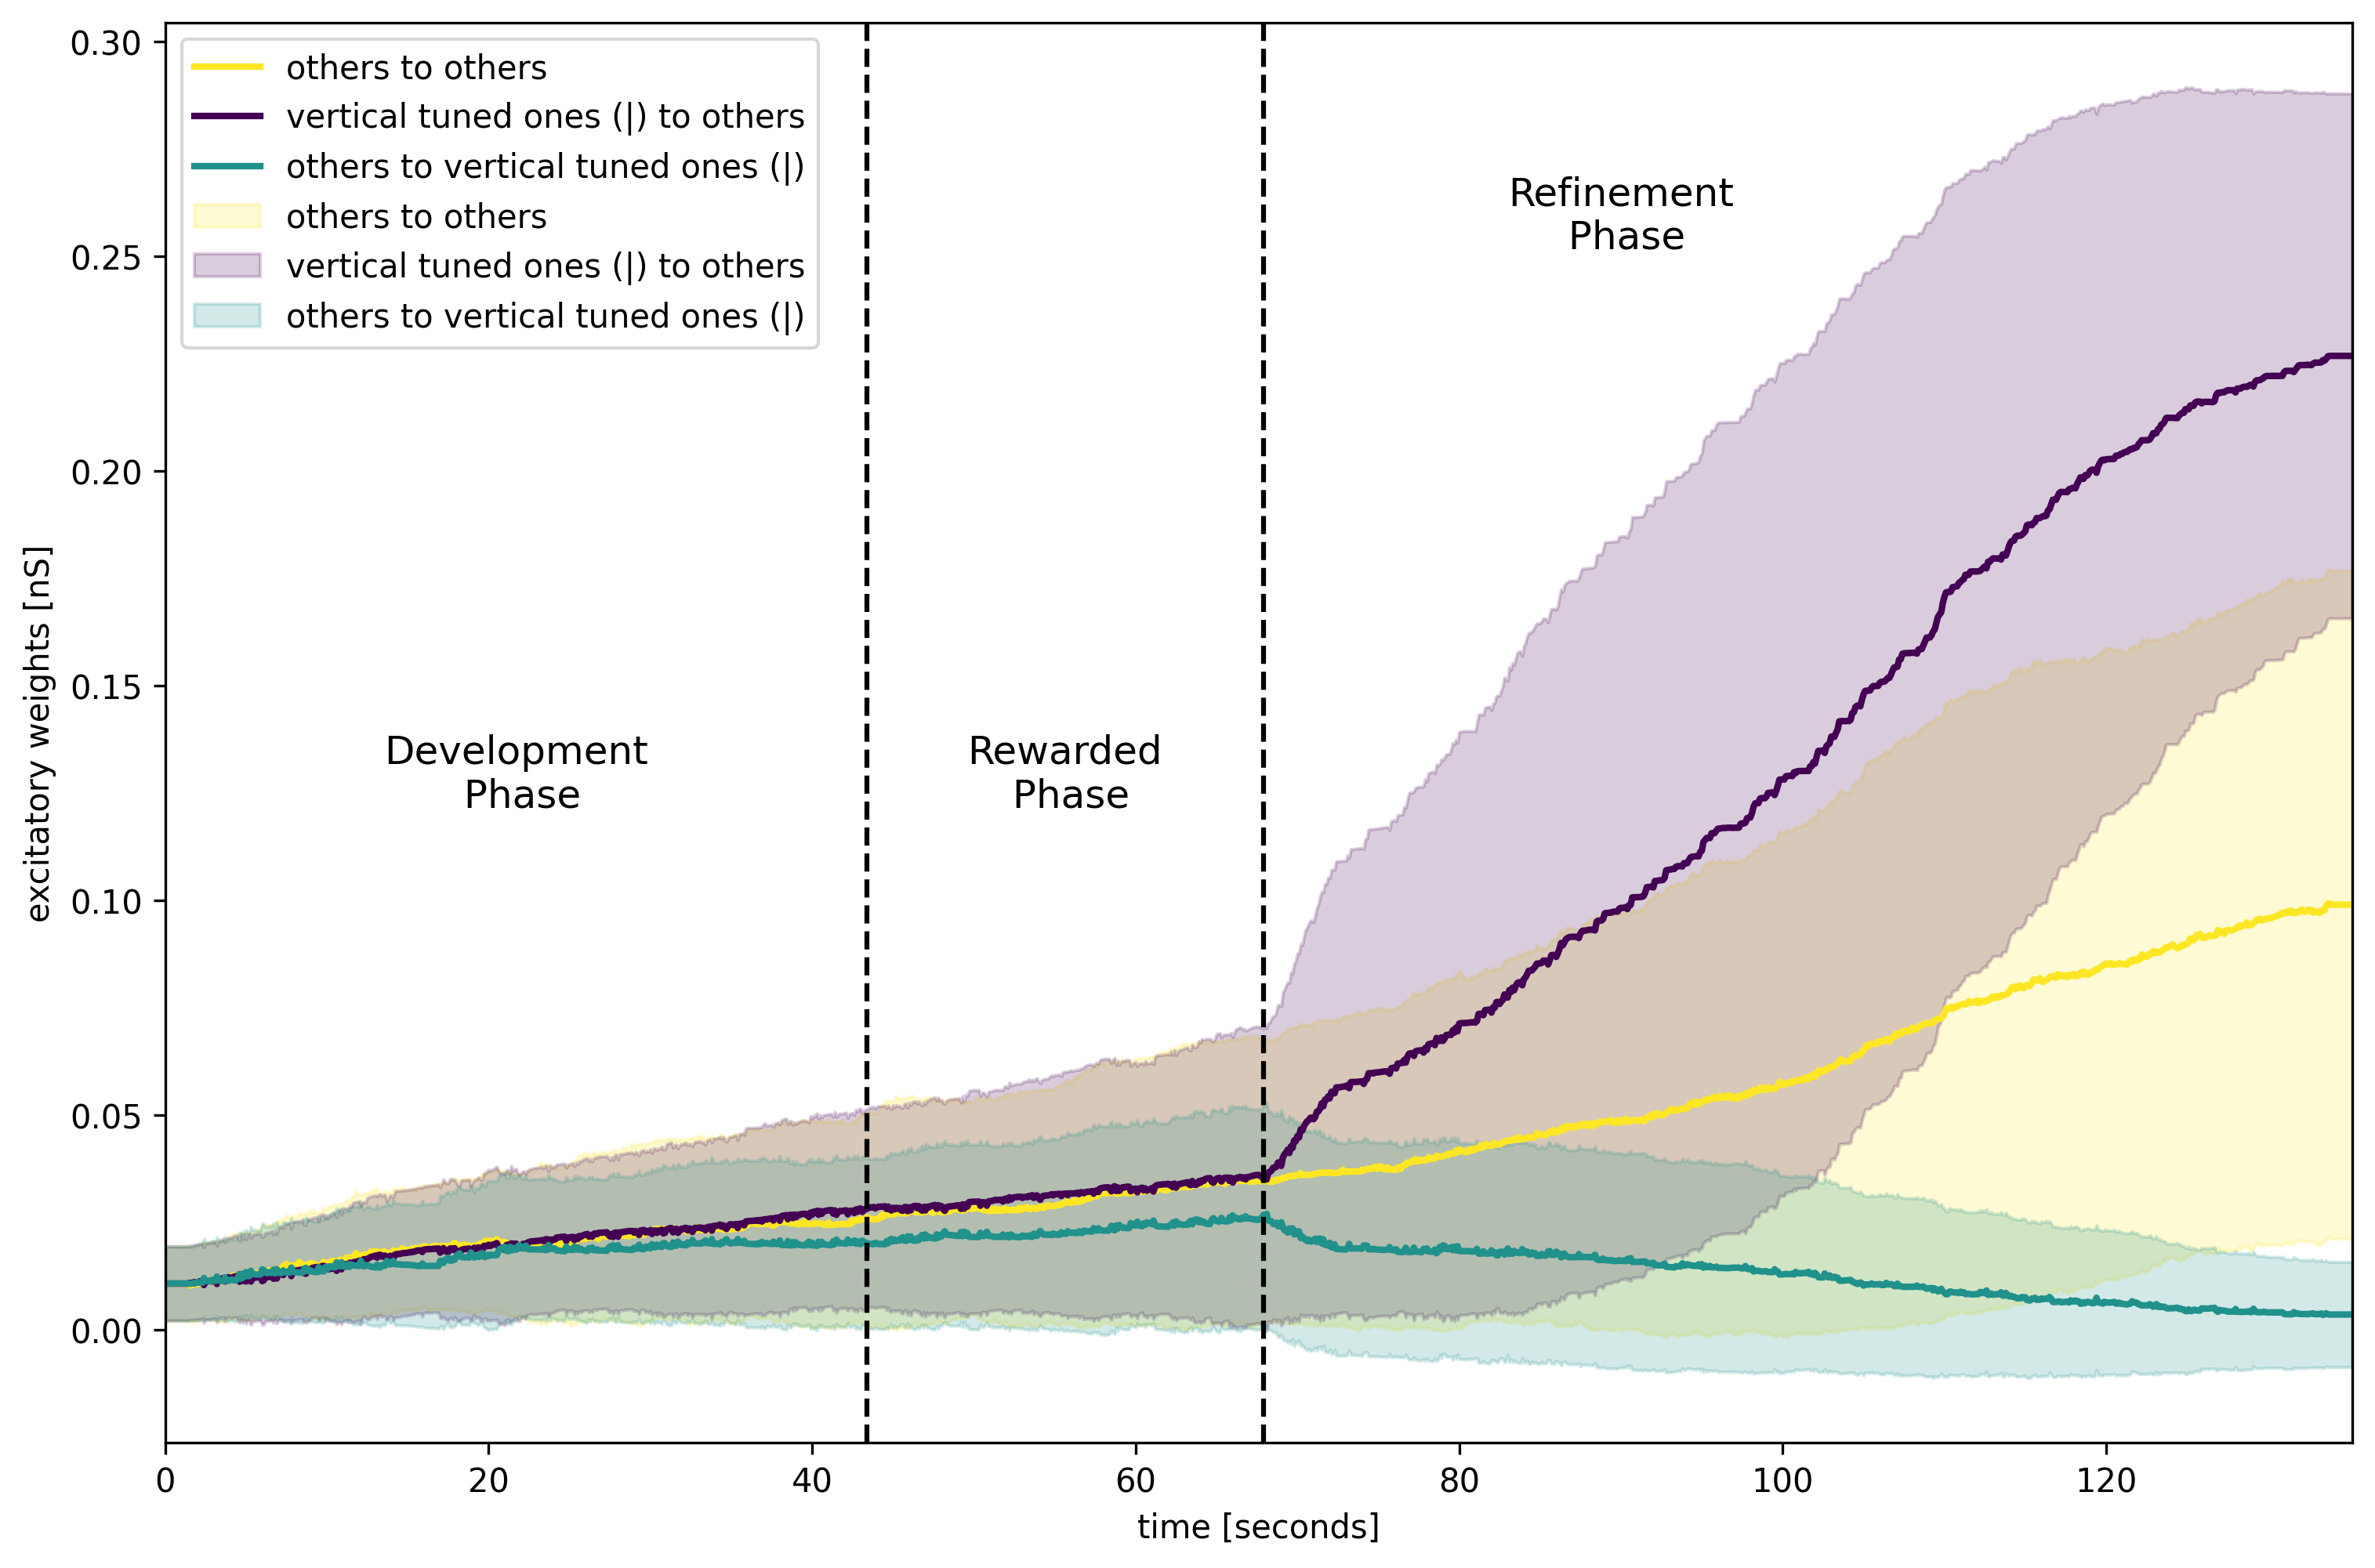

In [12]:
plt.figure(figsize=(12, 8), dpi = 300)
tsplot(data=PYR1and2toothers[:, :] / nS, color=cmaps.viridis(1.0)  ,label='others to others')
tsplot(data=PYR0toothers[:, :] / nS, color=cmaps.viridis(0.0)  ,label ='vertical tuned ones (|) to others')
tsplot(data=otherstoPYR0[:, :] / nS, color=cmaps.viridis(0.5)  ,label='others to vertical tuned ones (|)')
plt.xlabel('time [seconds]')
plt.ylabel('excitatory weights [nS]')
plt.xticks(np.arange(0, total * 10, 200), labels=np.arange(0, int(total), 20))
plt.legend(loc='upper left')
plt.axvline(x=warmup*10, color='k', linestyle='--')
plt.axvline(x=(warmup + rewardsimtime)*10, color='k', linestyle='--')
plt.text(warmup*10/2, 0.12, 'Development\n Phase', verticalalignment='bottom', horizontalalignment='center', fontsize=12)
plt.text(warmup*10+rewardsimtime*10//2, 0.12, 'Rewarded\n Phase', verticalalignment='bottom', horizontalalignment='center', fontsize=12)
plt.text(900, 0.25, 'Refinement\n Phase', verticalalignment='bottom', horizontalalignment='center', fontsize=12)


# Plot for tuning curve

In [13]:
tunings_initial = results['tuning_initial']
tuning_rewardend = results['tuning_rewardend']
tuning_after_rewardend = results['tuning_after_rewardend']
tunings_final = results['tuning_final']

WARNING    <ipython-input-14-47bef8fe39e9>:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(N_pop / 2, N_pop / 2, (k / groupsize) + 1)
 [py.warnings]
  plt.subplot(N_pop / 2, N_pop / 2, (k / groupsize) + 1)

WARNING    <ipython-input-14-47bef8fe39e9>:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(N_pop / 2, N_pop / 2, (k / groupsize) + 1)
 [py.warnings]
  plt.subplot(N_pop / 2, N_pop / 2, (k / groupsize) + 1)

WARNING    <ipython-input-14-47bef8fe39e9>:17: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(N_pop / 2, N_pop / 2, (k / groupsize) + 1)
 [py.warnings]
  plt.subplot(N_pop / 2, N_pop / 2, (k / gro

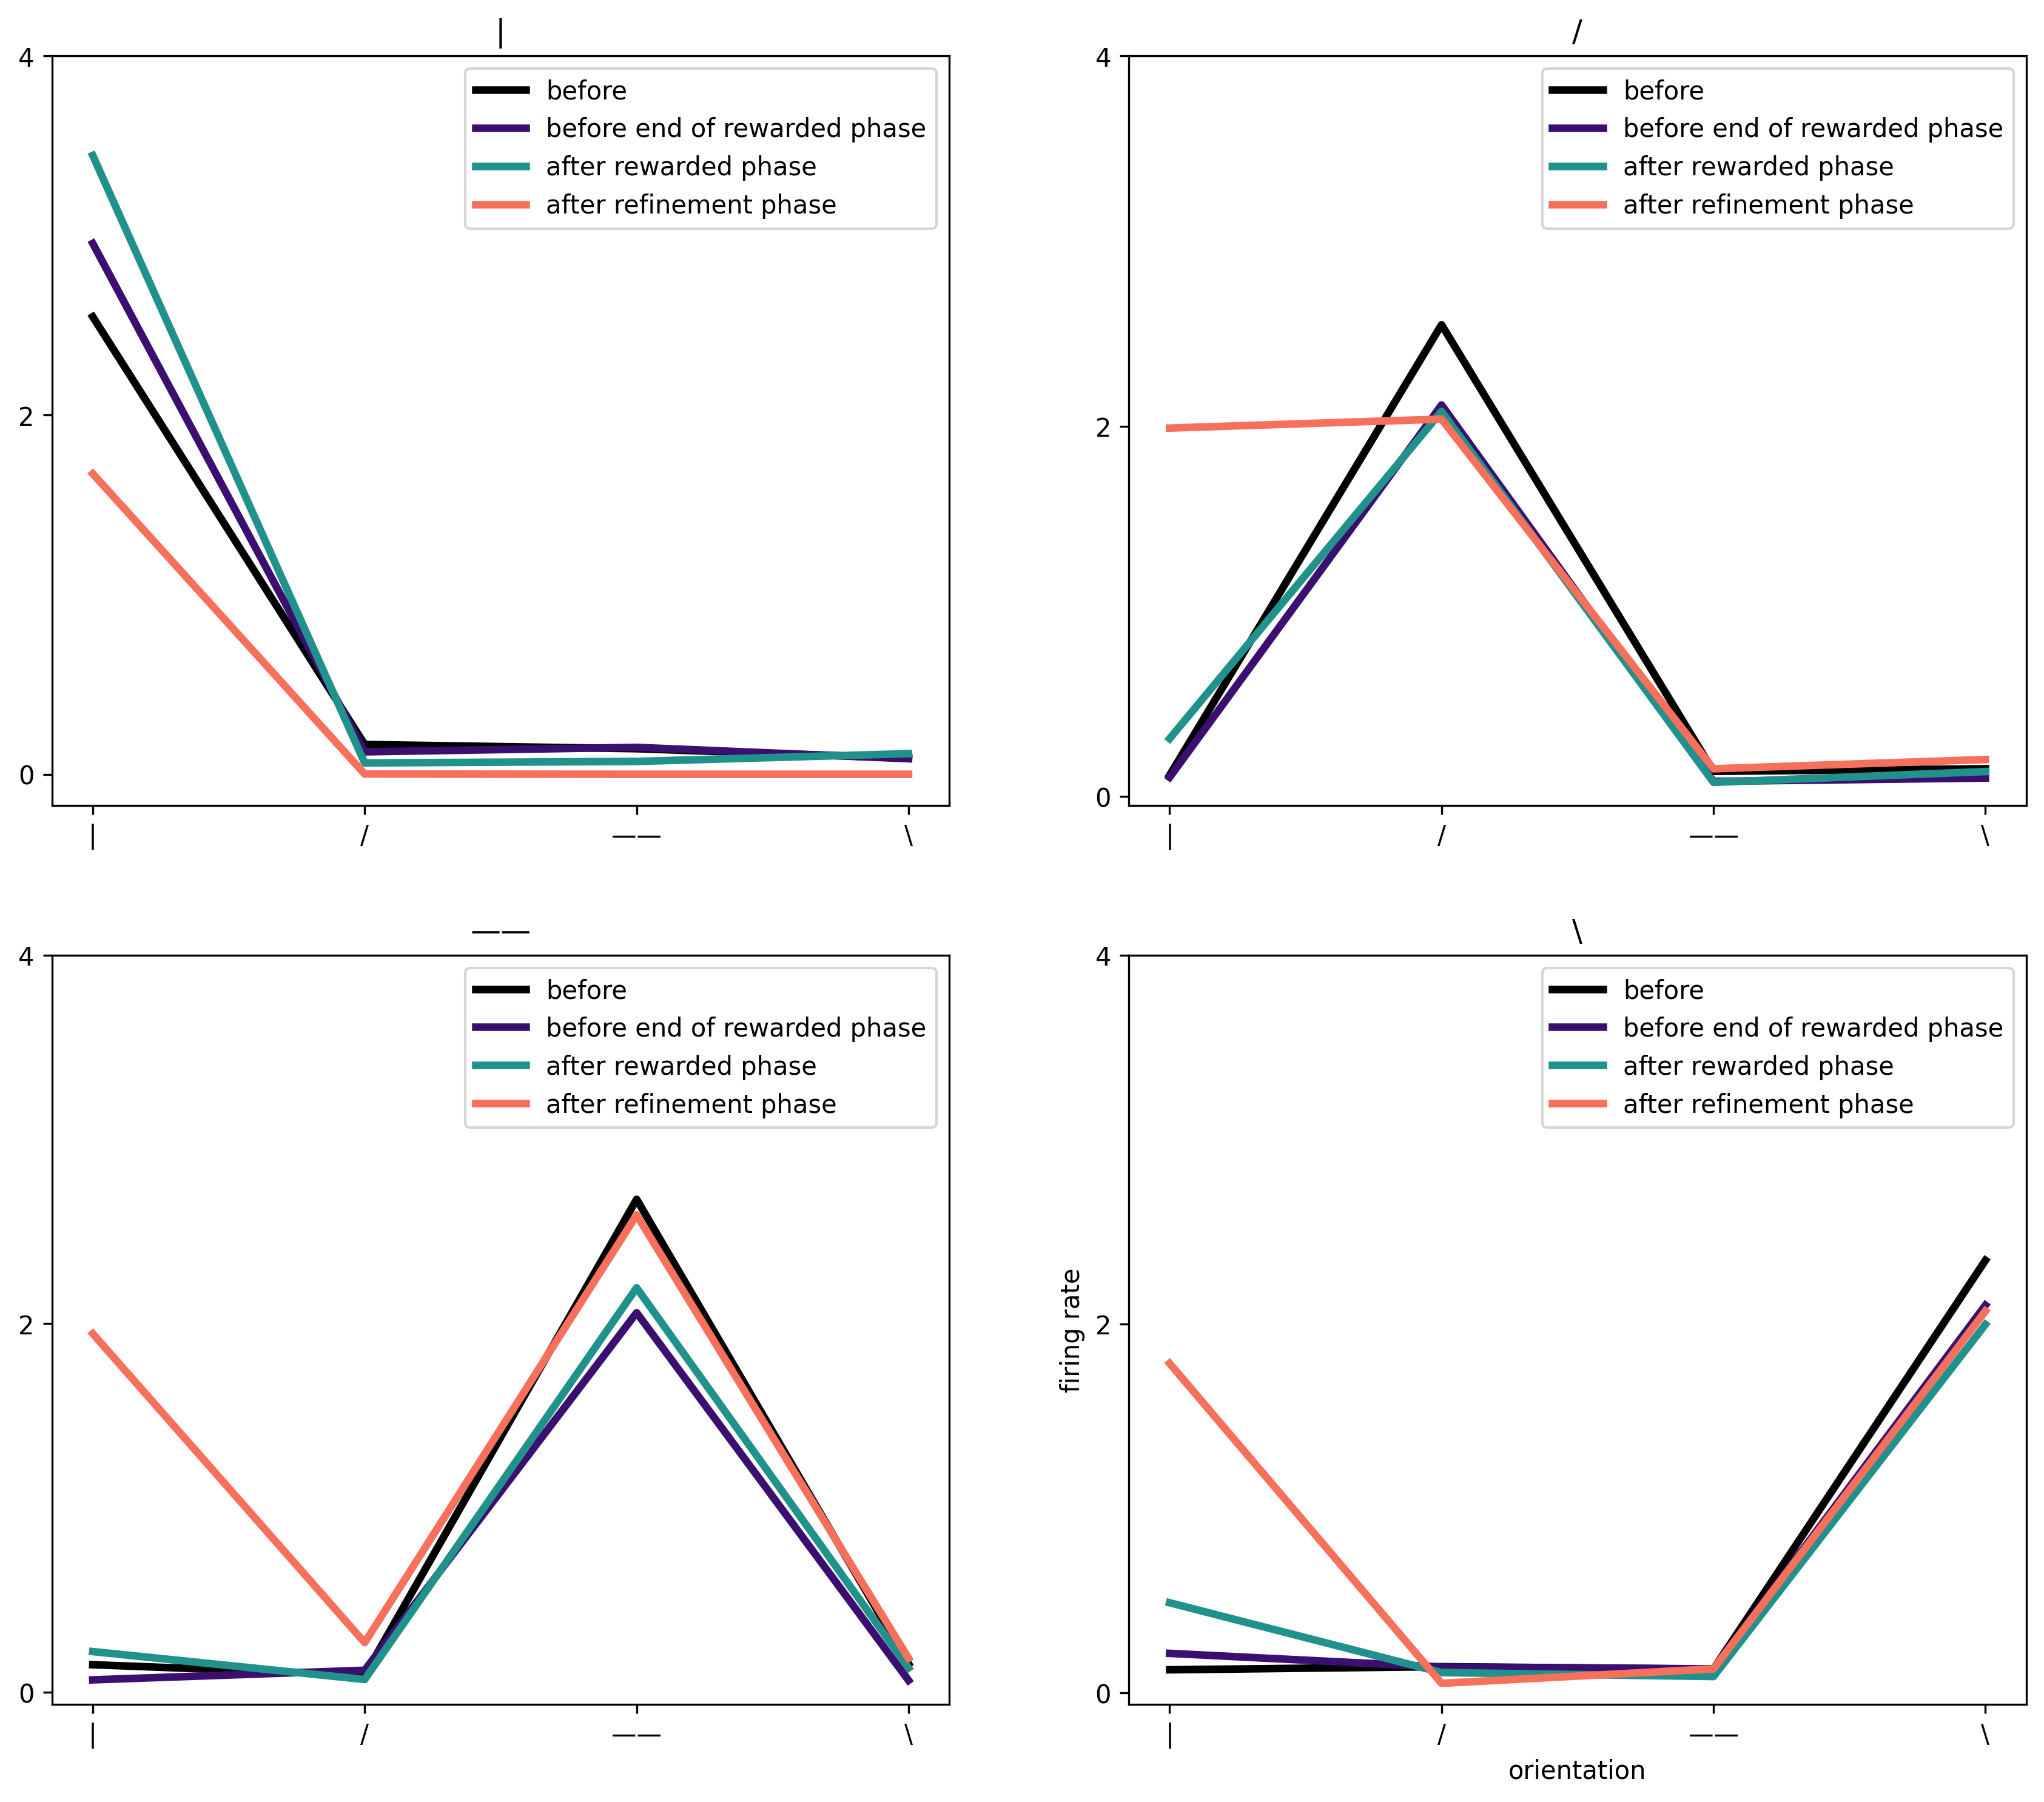

In [14]:
def plot_tuningcurves(tunings_initial,
                      tuning_rewardend,
                      tuning_after_rewardend,
                      tunings_final,
                      N_neurons=400,
                      N_pop=4,
                      save=None,
                      name=''):
    ymax = 4
    fig = plt.figure(figsize=(14, 12),dpi=300)  # 4.2, 3
    if name == '':
        max = 4
    groupsize = N_neurons / N_pop
    titles = ['|', '/', '——', '\\']
    for k in range(0, N_neurons, int(groupsize)):
        if N_pop > 1:
            plt.subplot(N_pop / 2, N_pop / 2, (k / groupsize) + 1)

        plt.plot(np.arange(np.shape(tunings_initial)[1]),
                 np.mean(tunings_initial[k:int(k + groupsize), :], 0),
                 'k',
                 lw=3,
                 label='before')

        if not tuning_rewardend is None:
            plt.plot(np.arange(np.shape(tunings_initial)[1]),
                     np.mean(tuning_rewardend[k:int(k + groupsize), :], 0),
                     color=cmaps.magma(0.2),
                     lw=3,
                     label='before end of rewarded phase')
            plt.title('/')
        if not tuning_after_rewardend is None:
            plt.plot(np.arange(np.shape(tunings_initial)[1]),
                     np.mean(tuning_after_rewardend[k:int(k + groupsize), :],
                             0),
                     color=cmaps.viridis(0.5),
                     lw=3,
                     label='after rewarded phase')
        if not tunings_final is None:
            plt.plot(np.arange(np.shape(tunings_initial)[1]),
                     np.mean(tunings_final[k:int(k + groupsize), :], 0),
                     color=cmaps.magma(0.7),
                     lw=3,
                     label='after refinement phase')
        plt.title(titles[int(k / groupsize)])
        plt.xticks(np.arange(0,
                             np.shape(tunings_initial)[1]),
                   ('|', '/', '——', '\\'))
        plt.yticks(np.arange(0, ymax + 1, 2))
        plt.legend()

    plt.xlabel('orientation')
    plt.ylabel('firing rate')
plot_tuningcurves(tunings_initial, tuning_rewardend, tuning_after_rewardend, tunings_final, N_pop=4, N_neurons=400)